<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> January 18, 2025 <strong>Author:</strong> Adnan Alaref
</div>

# **◍ Introduction**

**In this notebook we will see how the threshold impacts the trade-off between `true positives` and `false negatives`, which directly affects metrics like `precision` and `recall`.**

**First, we will present a set of definitions and formulas that we will use later.**
**Matrix:**

- **The term matrix in machien learning refers to a structured grid (typically 2x2 for binary classification or 𝑛×𝑛for multi-class problems) used to summarize the performance of a classification model(e.g., confusion matrix).**


**Metric:**

- **The term metric in machine learning refers to a numerical value derived from data (e.g., accuracy, precision, recall).**   
- **These metrics are computed using the values in the confusion matrix, making the confusion matrix the foundation for calculating various performance metrics.**

**Confusion Matrix:**

- **A confusion matrix is a table used in machine learning to evaluate the performance of a classification model.**  
- **It shows the number of correct and incorrect predictions for each class, making it easier to understand where the model performs well and where it struggles.**

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | **TN**                 | **FP**                 |
| **Actual Negative** | **FN**                 | **TP**                 |
 &nbsp;

**Definitions:**
- **True Positive (TP):**   
   - The model correctly predicted the positive class.

- **False Positive (FP):**   
   - The model predicted positive, but the actual class was negative (**type I error**).

- **True Negative (TN):**   
   - The model correctly predicted the negative class.

- **False Negative (FN):**   
   - The model predicted negative, but the actual class was positive (**type II error**).

 &nbsp;

**Metrics Derived from the Confusion Matrix:**
* **Accuracy:**
   - Proportion of total predictions that are correct.
   - **Formula:**
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

* **Precision (Positive Predictive Value):**
   - Proportion of positive predictions that are correct.
   - **Formula:**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$


* **Recall (Sensitivity or True Positive Rate):**
   - Proportion of actual positives that are correctly predicted.
   - **Formula:**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$


* **F1 Score:**
   - Harmonic mean of precision and recall, balancing their trade-off.
   - **Formula:**
$$
\text{F1 Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


* **Specificity (True Negative Rate):**
   - Proportion of actual negatives that are correctly predicted.
   - **Formula:**
$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

**Back to our topic threshold impacts the trade-off between precision and recall.**

In the context of binary classification (or similar tasks), **the threshold** is the value used to decide whether a model's output (typically a probability) is classified as a positive class or a negative class. Adjusting the threshold impacts the trade-off between true positives and false negatives, which directly affects metrics like **precision and recall**.

**Here's how it works:**
* **Lower threshold:**
   - More predictions are classified as positive.
   - This increases true positives but also increases false positives.
   - High recall but potentially low precision.

* **Higher threshold:**
   - Fewer predictions are classified as positive.
   - This decreases true positives, possibly increasing false negatives (missing actual positives).
   - High precision but potentially low recall.   

**Note:**   
  - If you keep increasing the threshold, the number of predictions classified as positive reduces. At some point, only the most confident predictions (very high probabilities) are classified as positive. While this improves precision, it will drastically reduce recall because you're likely missing a lot of true positives, classifying them as negative instead.

  - For example:
     * If you classify as **positive** only when the model's `output > 0.9`, even many correct positive predictions (e.g., **probabilities 0.85, 0.87**) will be missed.

**When to Use a Higher Threshold?**

* When precision is more critical than recall.
(e.g., in **spam detection**, where false positives—legitimate emails marked as spam—are highly undesirable.)

**When to Use a Lower Threshold?**

* When recall is more critical than precision.
(e.g., in **medical diagnostics**, where missing a disease case could have serious consequences.)

# **◍ Step 1: Import Libraries.**

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score ,recall_score
from sklearn.metrics import f1_score , roc_auc_score ,average_precision_score

sns.set()
%matplotlib inline
plt.style.use("dark_background")

import warnings
# For Ignore all warnings
warnings.filterwarnings('ignore')
# For Ignore all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# **◍ Step 2: Create Dataset.**

In [81]:
# Define random data for classification task
X ,y = make_classification(n_samples=5000 ,n_classes=2,random_state=42)
len(X) ,len(y) ,X.shape ,y.shape ,type(X) ,type(y)

(5000, 5000, (5000, 20), (5000,), numpy.ndarray, numpy.ndarray)

# **◍ Step 3: Let's Visualize..**

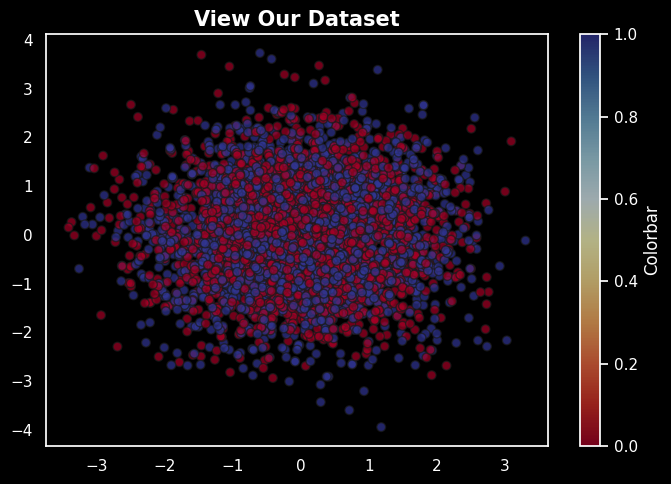

In [82]:
plt.figure(figsize =(7,5) ,dpi=100)

# Scatter plot with enhancement
graph = plt.scatter(x = X[:,0],
                    y = X[:,1],
                    c = y, 
                    cmap = plt.cm.RdYlBu,
                    alpha= 0.7,
                    edgecolors='k',
                    s = 40)
# Add colorbar to show the mapping of values to colors
plt.colorbar(graph ,label='Colorbar')
plt.title("View Our Dataset" ,fontsize = 15 ,fontweight = 'bold')

plt.tight_layout()
plt.grid(False)
plt.show()

# **◍ Step 4: Split Data Into Train and Test Sets..**

In [83]:
X_train ,X_test ,y_train ,y_test =  train_test_split(X ,y ,test_size = 0.2 , random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 20)
(1000, 20)
(4000,)
(1000,)


In [84]:
X_train[:5],y_train[:5]

(array([[ 1.08701021, -1.74573378, -1.53594947,  0.18099819,  0.65278052,
         -3.07638372, -0.80520729,  0.50661933, -0.30993453,  1.93214295,
         -0.3066629 , -0.32601114,  1.35273319,  2.45467359, -0.06625357,
         -1.37361254,  0.36726578,  0.47865512,  0.92474913,  2.03863253],
        [ 1.83904053, -1.15079596,  0.63231796,  1.13739643, -1.11640106,
          0.16995197, -0.84063873, -0.04134649,  0.13420648, -0.52157158,
          0.40016504, -0.42025488,  1.52020545, -0.32888397, -0.49864492,
         -1.73663594, -0.39112372, -0.33946025,  0.31879391,  2.41725091],
        [ 2.31160938, -0.76694126, -1.94169405,  1.0243462 ,  0.61783822,
          0.25846017, -0.38463013, -0.32648262, -0.52595274,  0.21309057,
         -0.07482854, -0.74115977, -2.07244695, -1.08691369, -0.67149751,
         -2.33852533, -1.08703033, -0.86064913, -1.3491721 , -0.21689025],
        [ 0.03130438, -0.20718853,  0.32301022, -0.52687355, -1.18663947,
         -0.52688884,  0.91899968, 

**Note: Here we are not need to make Standardization** :  

 * **The synthetic dataset generated by make_classification** already has features on a **similar scale**.   
 * **Make_classification** produces features that are centered around 0 and have unit variance (this is the default behavior).  

* If the features in your dataset have different scales, it's generally a good idea to apply **StandardScaler** before training the model, especially for **models** that are **sensitive to the scale of data**, like Logistic Regression, Support Vector Machines (SVM),k-Nearest Neighbors (k-NN).

# **◍ Step 5: Build The Model..**

In [85]:
Model  = LogisticRegression(random_state=42)
Model.fit(X_train ,y_train)

LogisticRegression(random_state=42)

# **◍ Step 6: Evaluat The Model..**

In [86]:
y_preds = Model.predict(X_test)
y_pred_probs = Model.predict_proba(X_test)
# Display Model Insights
print(f"Model Predictions: {y_preds[:5]}")
print(f"Model Probabilites: \n {y_pred_probs[:5]}")

Model Predictions: [0 1 0 0 0]
Model Probabilites: 
 [[9.03795010e-01 9.62049898e-02]
 [7.13678117e-02 9.28632188e-01]
 [9.99269132e-01 7.30868457e-04]
 [6.94170748e-01 3.05829252e-01]
 [9.96043594e-01 3.95640590e-03]]


In [87]:
acc_value = accuracy_score(y_test ,y_preds)
precision_value = precision_score(y_test ,y_preds)
recall_value = recall_score(y_test ,y_preds)
f1_score_value = f1_score(y_test ,y_preds)

# Calulate Area under the curve for 2 curves AUC_PR & AUC_ROC
Auc_Roc_value = roc_auc_score(y_test ,y_pred_probs[:,1]) # Probabilities for the positive class
Auc_pr_value = average_precision_score(y_test ,y_pred_probs[:,1])

# Display Resultes
print(f"Accuracy: {acc_value:.2f} - Precision: {precision_value:.2f} - Recall: {recall_value:.2f} - F1_Score: {f1_score_value:.2f} - AUC-PR: {Auc_pr_value:.2f} - AUC-ROC: {Auc_Roc_value:.2f} \n")

Accuracy: 0.87 - Precision: 0.87 - Recall: 0.87 - F1_Score: 0.87 - AUC-PR: 0.94 - AUC-ROC: 0.94 



In [88]:
# Log Loss calculate depends on probabilites vlaues not predicted labels
Log_loss_vlaue = log_loss(y_test,y_pred_probs)
print(f"Log Loss: {Log_loss_vlaue}")

Log Loss: 0.3234071210427452


## **🔸 Step 6.1: Display Confusion Matrix**.

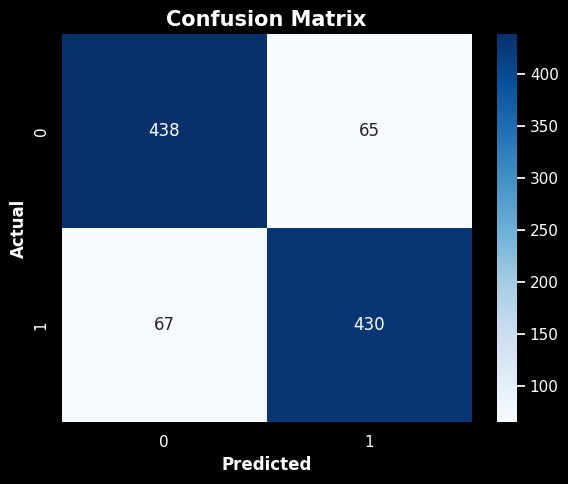


Conf_Matrix Output: 
[[438  65]
 [ 67 430]]

TN: 438 |FP: 65 |FN: 67 |TP: 430


In [89]:
# Generate confusion matrix
Conf_Matrix = confusion_matrix(y_test , y_preds)

# PLOT HEATMAP
plt.figure(figsize = (6,5) ,dpi=100)
sns.heatmap(Conf_Matrix ,cmap = plt.cm.Blues ,annot=True ,fmt ='d')
plt.title('Confusion Matrix',fontsize = 15 ,fontweight = 'bold')
plt.xlabel('Predicted' ,fontsize = 12 ,fontweight = 'bold')
plt.ylabel('Actual' ,fontsize = 12 ,fontweight = 'bold')
plt.tight_layout()
plt.show()

# Find TP ,TN ,FP ,FN
tn ,fp ,fn ,tp = Conf_Matrix.ravel()  # tabel order in sklearn

print(f"\nConf_Matrix Output: \n{Conf_Matrix}")
print(f"\nTN: {tn} |FP: {fp} |FN: {fn} |TP: {tp}")

## **🔸 Step 6.2: Generate Classification Report**.

In [90]:
# Generate the classification report
report = classification_report(y_test ,y_preds ,target_names=["Class 0" ,"Class 1"])
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.87      0.87       503
     Class 1       0.87      0.87      0.87       497

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



# **◍ Step 7: Impacte Threshold on Precision and Recall metrics.**

**Let's Compute precision-recall pairs for different probability thresholds by using precision_recall_curve(y_val ,y_probs).**  
* **First Calulate probabilities of the positive class (class 1),Why?**
   - The **precision_recall_curve function** needs the **predicted probabilities for the positive class (class 1)** to compute precision, recall, and thresholds.
   - By specifying **y_probs[:, 1]** , you're passing only the probabilities of the positive class (class 1) to the function.
   - These probabilities are then used to compute the **tradeoff** between precision and recall at various thresholds.



In [91]:
y_probs_positive_class = y_pred_probs[:,1]
y_probs_positive_class[:5]

array([9.62049898e-02, 9.28632188e-01, 7.30868457e-04, 3.05829252e-01,
       3.95640590e-03])

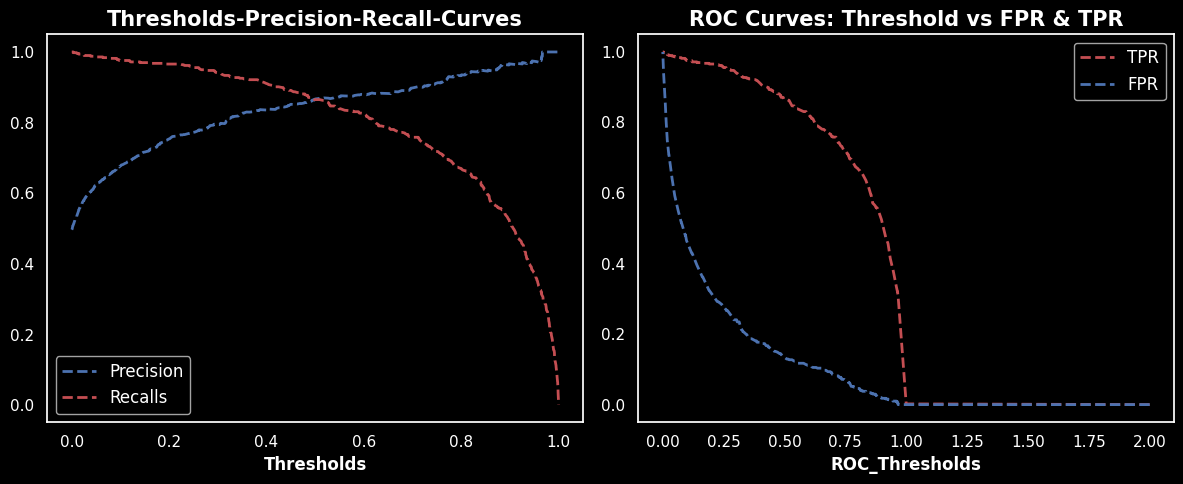

In [92]:
from sklearn.metrics import roc_curve
# Calculate precision, recall, and thresholds for the positive class (class 1)
precisions ,recalls ,thresholds = precision_recall_curve(y_test ,y_probs_positive_class)

# Exclude last precision and last recall, as it doesn't have a threshold
precisions , recalls = precisions[:-1] ,recalls[:-1]

# Calculate False_Positive Rate(FPR), True Positive Rate(TPR), and Roc_Thresholds.
FPR ,TPR ,ROC_Thresholds = roc_curve(y_test ,y_pred_probs[:,1])

# Create a figure with a specific size and resolution
plt.figure(figsize = (12,5) ,dpi = 100)

# Plot Threshold-Precision-Recall curve
plt.subplot(1,2,1)
plt.plot(thresholds ,precisions ,'b--' ,label = "Precision",linewidth=2)
plt.plot(thresholds ,recalls ,'r--' ,label = "Recalls",linewidth=2)
plt.xlabel("Thresholds" ,fontsize = 12 ,fontweight = 'bold')
plt.title("Thresholds-Precision-Recall-Curves",fontsize = 15 ,fontweight ='bold')
plt.legend(loc = 'best' ,fontsize = 12) # Adds the legend to the plot
plt.grid(False)  # Add gridlines

# Plot ROC curve
plt.subplot(1,2,2)
plt.plot(ROC_Thresholds ,TPR ,'r--' ,label = "TPR" ,linewidth=2)
plt.plot(ROC_Thresholds ,FPR ,'b--' ,label = "FPR" ,linewidth=2)
plt.xlabel("ROC_Thresholds" ,fontsize = 12 ,fontweight = 'bold')
plt.title("ROC Curves: Threshold vs FPR & TPR", fontsize=15, fontweight='bold')
plt.legend(loc = 'best' ,fontsize = 12) # Adds the legend to the plot
plt.grid(False)  # Add gridlines

plt.tight_layout() # Adjust layout to avoid overlapping text
plt.show()

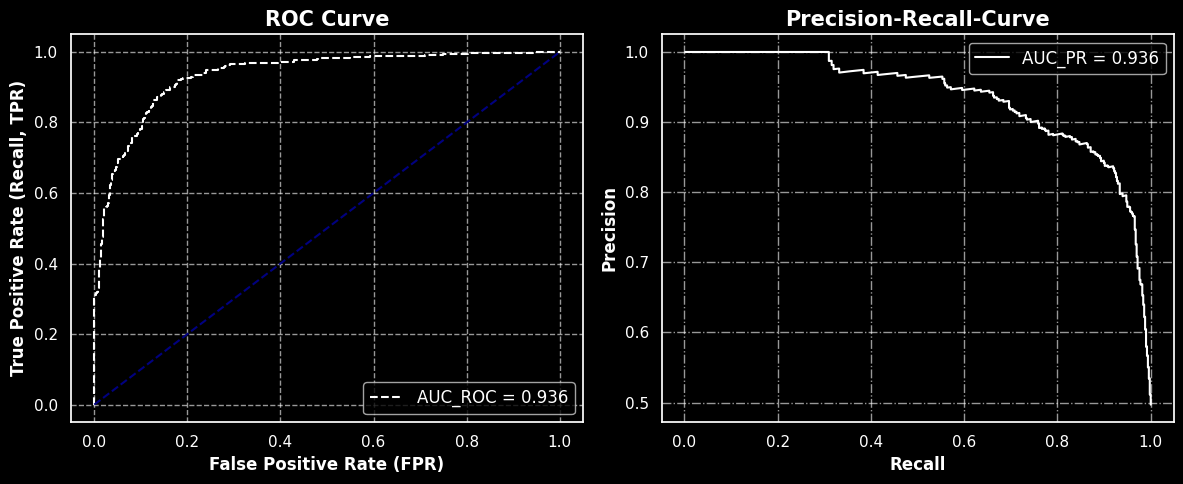

In [93]:
FPR ,TPR ,ROC_Thresholds = roc_curve(y_test ,y_pred_probs[:,1])

plt.figure(figsize=(12,5) ,dpi= 100)
# Plot ROC curve
plt.subplot(1,2,1)
plt.plot(FPR ,TPR,color = 'white' ,linestyle = '--',label = f'AUC_ROC = {Auc_Roc_value:.3f}')
plt.plot([0,1] ,[0,1] ,color = 'navy' ,linestyle = '--')# Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)',fontsize = 12 ,fontweight = 'bold')
plt.ylabel('True Positive Rate (Recall, TPR)',fontsize = 12 ,fontweight = 'bold')
plt.title('ROC Curve' ,fontsize = 15 ,fontweight ='bold')
plt.grid(True ,linestyle = '--' ,alpha = 0.6)# Add gridlines
plt.legend(loc='best' ,fontsize = 12)

# Plot Precision-Recall Curve
plt.subplot(1,2,2)
plt.plot(recalls ,precisions ,'w-' ,label = f'AUC_PR = {Auc_pr_value:.3f}')
plt.xlabel("Recall" ,fontsize = 12 ,fontweight = 'bold')
plt.ylabel("Precision" ,fontsize = 12 ,fontweight = 'bold')
plt.title("Precision-Recall-Curve",fontsize = 15 ,fontweight ='bold')
plt.grid(True, linestyle='-.', alpha=0.6)  # Add gridlines
plt.legend(loc='best' ,fontsize = 12)

plt.tight_layout() # Adjust layout to avoid overlapping text
plt.show()

# **◍ Step 8: Find The Best Threshold.**

## **🔸 Step 8.1: Target Precision or Recall Performance.**
* **Scenario:**
     - **Given a specific precision (or recall), we can find the optimal threshold.**  

* **Note:**
  * **Precison:**
     -  **Increasing array** so when we need to get a **index** of target threshold we use **argmax** to best_target_threshold.
  * **Recall:**
     - **Decreasing array** so when we need to get a **index** target threshold we use **argmin** to best_target_threshold.

In [94]:
target_precision = 0.935
best_threshold_idx = np.argmax(precisions >= target_precision)
best_threshold = thresholds[best_threshold_idx]
print(f"Threshold: {best_threshold:.3f} | Precision: {target_precision:.3f} | Recall: {recalls[best_threshold_idx]:.3f}")

Threshold: 0.800 | Precision: 0.935 | Recall: 0.670


In [95]:
target_recall = 0.821
best_threshold_idx = np.argmin(recalls >= target_recall)
best_threshold = thresholds[best_threshold_idx]
print(f"Threshold: {best_threshold:.3f} | Precision: {precisions[best_threshold_idx]:.3f} | Recall: {target_recall:.3f}")

Threshold: 0.605 | Precision: 0.879 | Recall: 0.821


## **🔸Step 8.2: Find Best Threshold By Calculate Euclidean.**
* **Scenario:**
  - Find the euclidean distance of each
point (r, p) to (1, 1) and use the minimum distance one!.

* **Note:**
  - The best performance is at point (1, 1).  
  - **Euclidean_distance = √[ (x2– x1)^2 + (y2– y1)^2]**.


In [96]:
%%time
# Way 1
distances = []
best_point = (1,1)
for p,r in zip(precisions[:-1] ,recalls[:-1]):
  distance = np.sqrt((p-1)**2 + (r-1)**2)
  distances.append(distance)
best_index = np.argmin(distances)

# Display results
print(f"Best Distance : {np.min(distances):.3f}")
print(f"Best Threshold: {thresholds[best_index]:.3f} | Precision: {precisions[:-1][best_index]:.3f} | Recall: {recalls[:-1][best_index]:.3f}")

Best Distance : 0.182
Best Threshold: 0.387 | Precision: 0.837 | Recall: 0.920
CPU times: user 3.08 ms, sys: 0 ns, total: 3.08 ms
Wall time: 2.93 ms


In [97]:
%%time
# way 2
distances_values = np.sqrt((1 - precisions)**2 + (1 - recalls)**2)
thresholds_values = np.append(thresholds,1)
best_indx = np.argmin(distances_values)

# Display results
print(f"Best Distance : {np.min(distances_values):.3f}")
print(f"Best Threshold: {thresholds_values[best_indx]:.3f} | Precision: {precisions[best_indx]:.3f} | Recall: {recalls[best_indx]:.3f}")

Best Distance : 0.182
Best Threshold: 0.387 | Precision: 0.837 | Recall: 0.920
CPU times: user 1.19 ms, sys: 12 µs, total: 1.2 ms
Wall time: 1.03 ms


## **🔸Step 8.3: Find all F1-score for each Precion - recall - Point.**
* **Scenario:**
  - compute F-score for each point(p,r), and find the maximum F-score.

>**Note:** After compute F-score for each point(p,r), and find the maximum F-score ,we need to find index of maximum f_score and then access best threshold.

In [98]:
# Calculate F1-scores for all thresholds
f1_scores_each_point_p_r = (2* precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] +1e-9)  # Avoid division by zero

Max_F1_score = np.max(f1_scores_each_point_p_r)
best_idx = np.argmax(f1_scores_each_point_p_r)
best_threshold_from_fscores = thresholds[best_idx]
print(f"Best_F1_score: {Max_F1_score:.3f}")
print(f"Best Threshold: {best_threshold_from_fscores:.3f} | Precision: {precisions[best_idx]:.3f} | Recall: {recalls[best_idx]:.3f}")

# Print results
'''
# Uncomment To show all Results.
for t,p,r,f1 in zip(thresholds ,precisions[:-1] ,recalls[:-1] ,f1_scores_each_point_p_r[:-1]):
  print(f"Threshold: {t:.2f}, Precision: {p:.2f}, Recall: {r:.2f}, F1-Score: {f1:.2f}")
'''

Best_F1_score: 0.876
Best Threshold: 0.387 | Precision: 0.837 | Recall: 0.920


<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>